In [2]:
!git clone https://github.com/ultralytics/yolov5



Cloning into 'yolov5'...
remote: Enumerating objects: 13271, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13271 (delta 51), reused 44 (delta 26), pack-reused 13198
Receiving objects: 100% (13271/13271), 13.21 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (9115/9115), done.


In [3]:
%cd /content/yolov5

/content/yolov5


In [4]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [6]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="zeSa0ZMdigq3dU33WRXn")
project = rf.workspace("hasintha-hewage").project("plantdoc-cbl3c")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 44.8 MB/s 
     |████████████████████████████████| 178 kB 69.4 MB/s 
     |████████████████████████████████| 1.1 MB 56.8 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 138 kB 74.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=3730a9ae04eebc60e639dc48a2fd68864e7f021aab7add3522bcf9bbcbfd5346
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=dced69b586202e3c0711861173774511bbfae198345fcbb630b0a783ee4b6f50
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PlantDoc-2 in yolov5pytorch:: 100%|██████████| 5150/5150 [00:02<00:00, 2232.78it/s]


In [8]:
%load_ext tensorborad
%tensorborad --logdir runs

ModuleNotFoundError: ignored

In [7]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results  --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/PlantDoc-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun comman

In [9]:
!pip install tensorborad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorborad (from versions: none)
ERROR: No matching distribution found for tensorborad


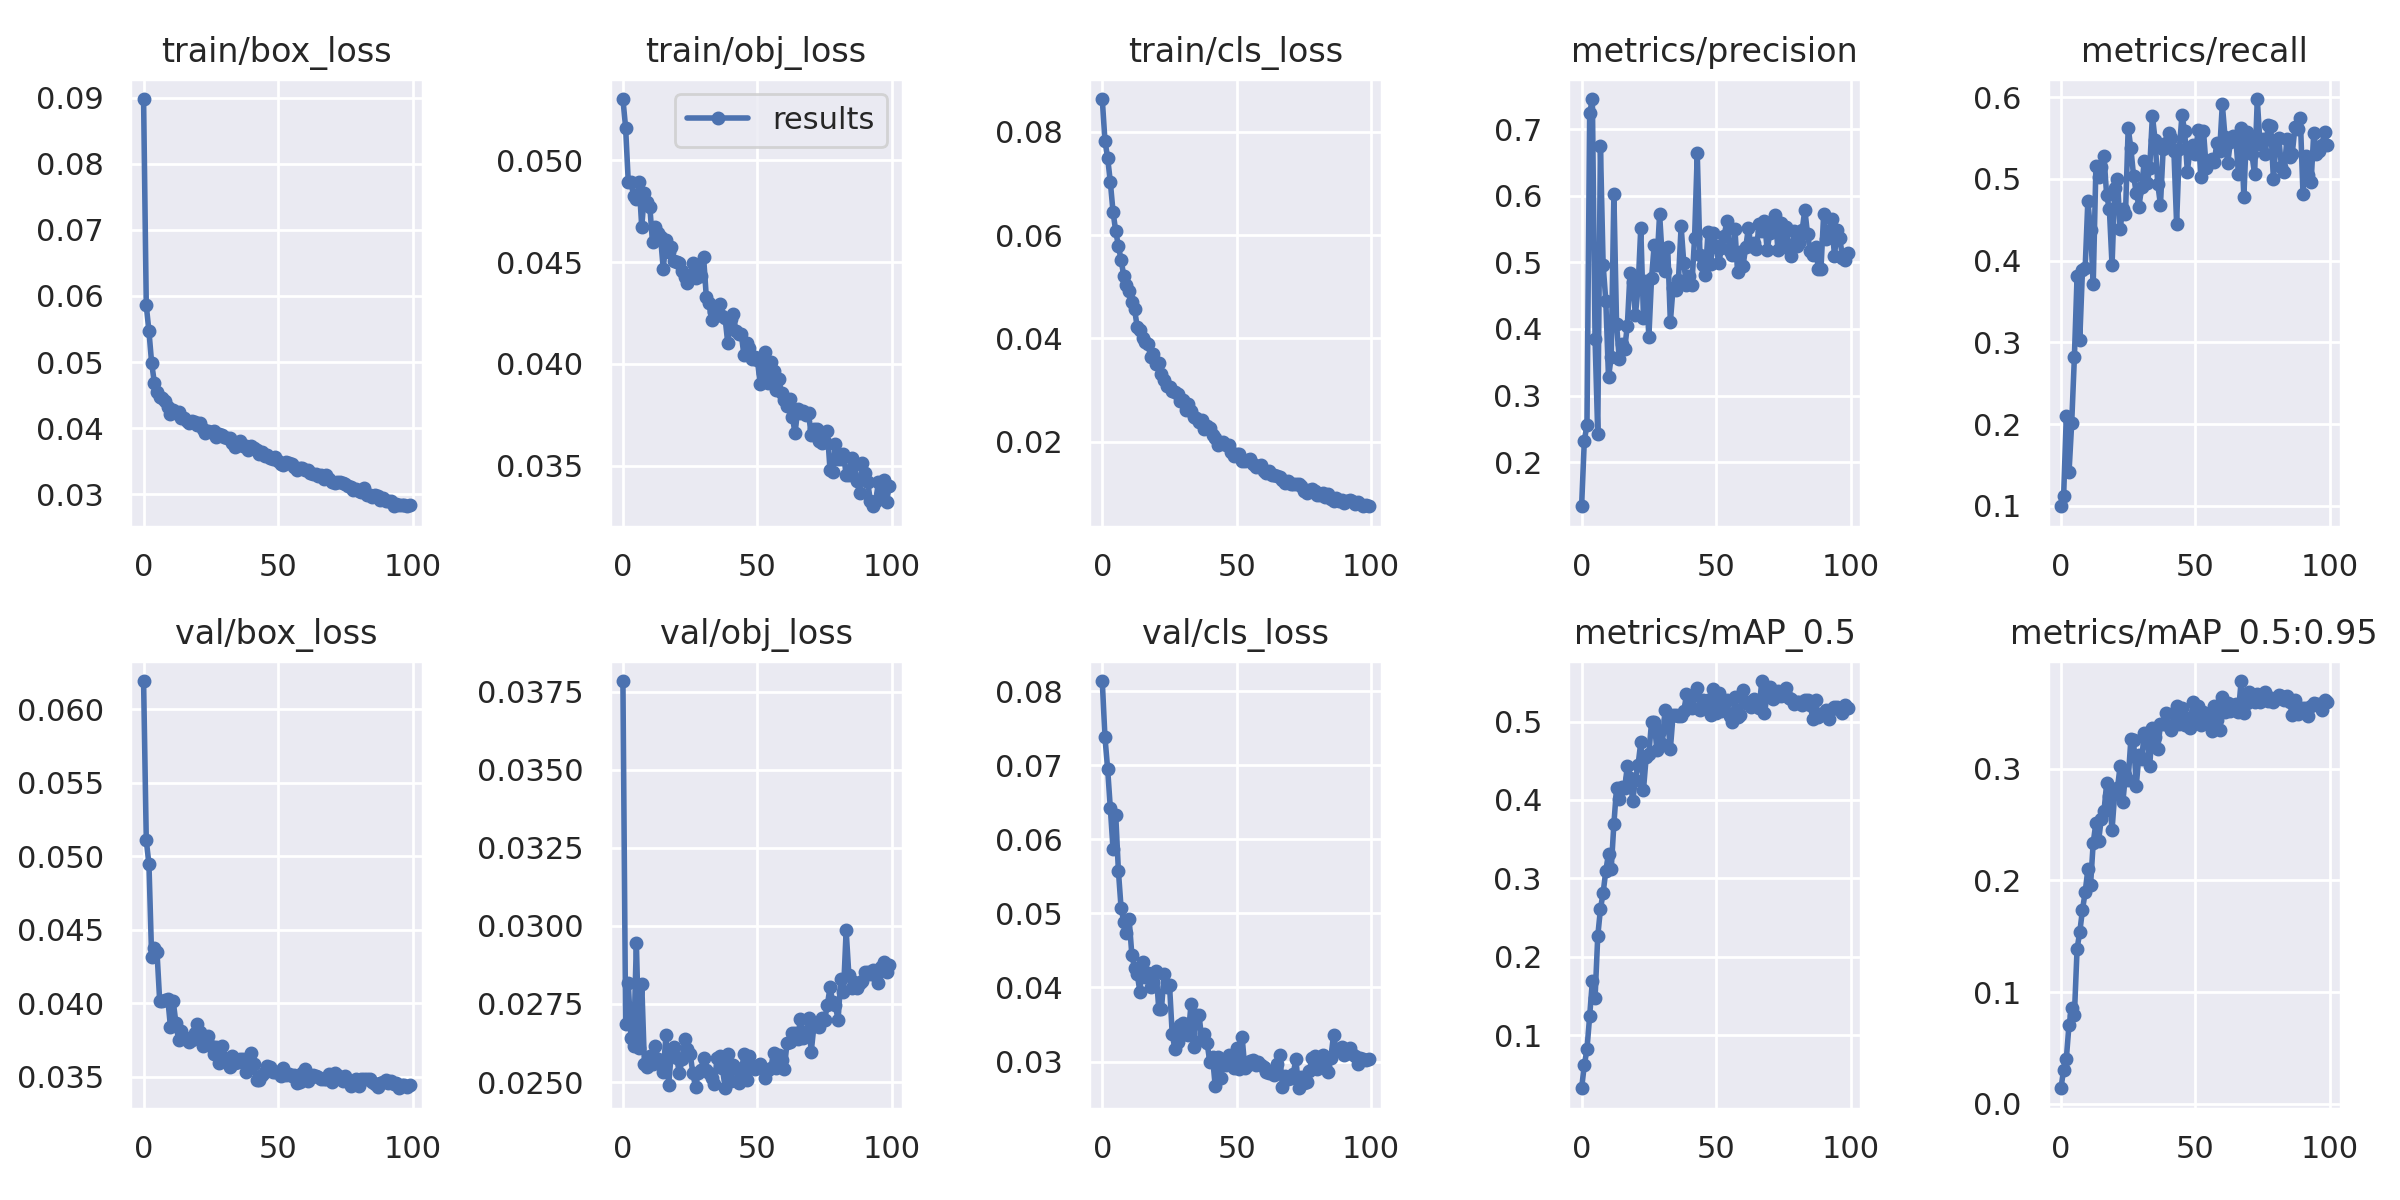

In [10]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


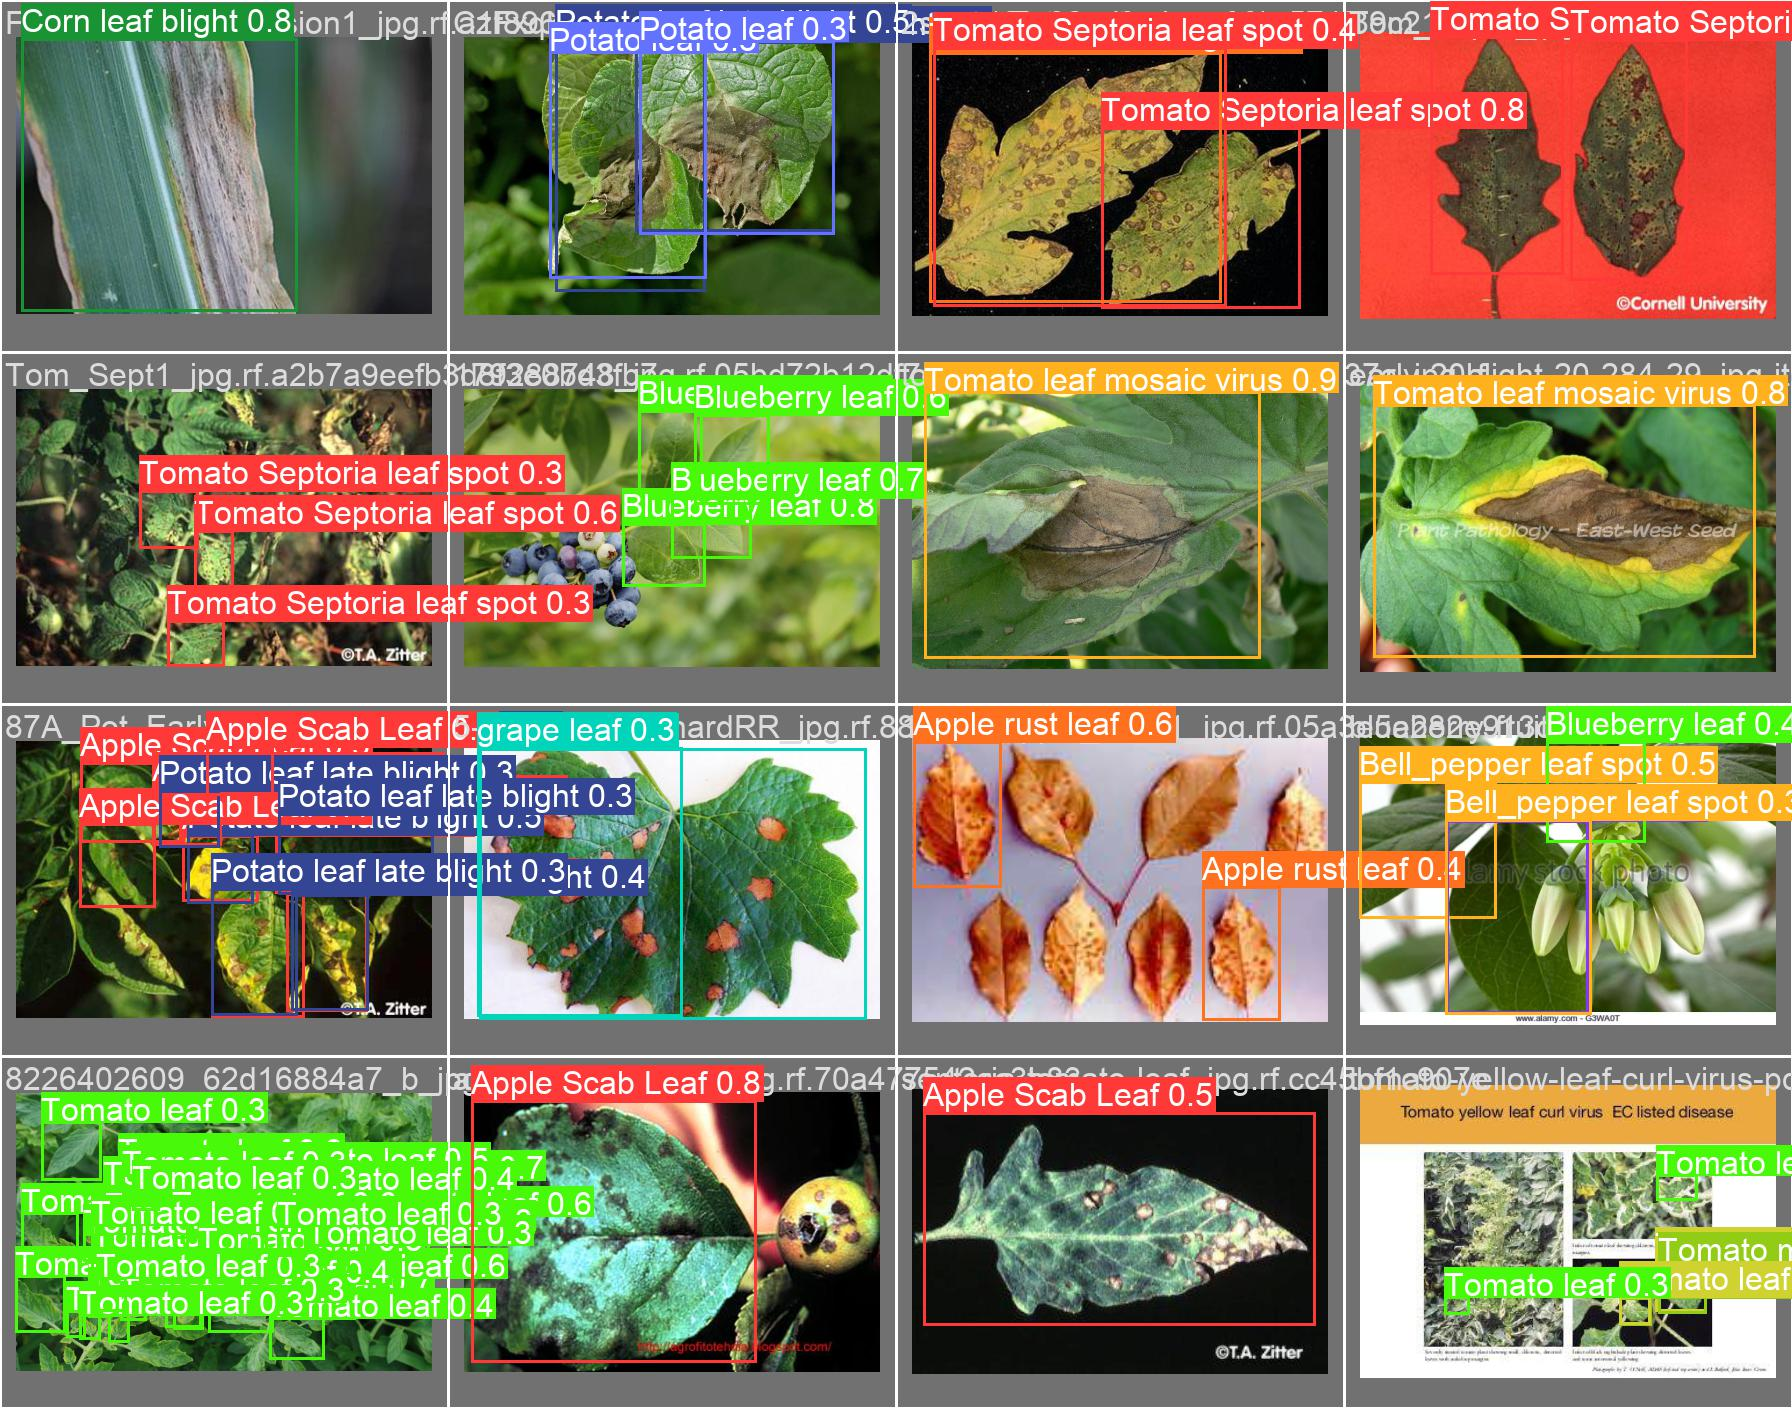

In [16]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch1_pred.jpg', width=900)

In [17]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/PlantDoc-2/test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/PlantDoc-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-183-gc98128f Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7091035 parameters, 0 gradients, 16.0 GFLOPs
image 1/204 /content/yolov5/PlantDoc-2/test/images/-2320-Bacterial-Spot-and-Speck_jpg.rf.3ebf9dd5c0b436959a064467edbbff9d.jpg: 320x416 2 Tomato Septoria leaf spots, 11.8ms
image 2/204 /content/yolov5/PlantDoc-2/test/images/000_jpg.rf.1aa442861ebabdd012269ce831c36685.jpg: 320x416 (no detections), 7.4ms
image 3/204 /

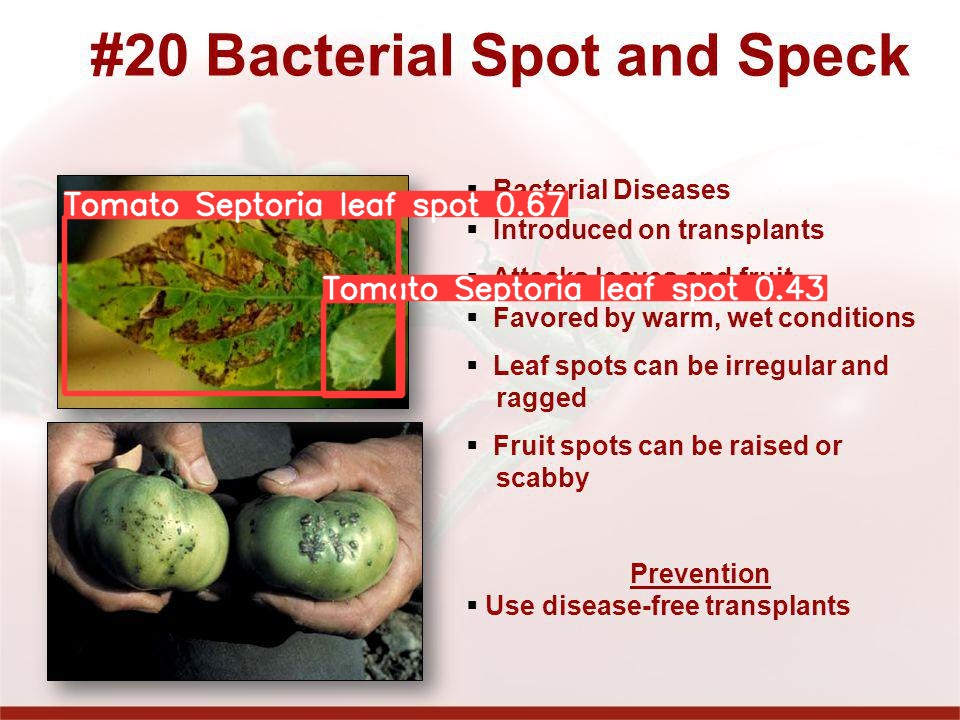

In [19]:
Image(filename='/content/yolov5/runs/detect/exp/-2320-Bacterial-Spot-and-Speck_jpg.rf.3ebf9dd5c0b436959a064467edbbff9d.jpg', width=900)

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')
%cp /content/yolov5/weights/last_yolov5s_custom.pt /content/gdrive/My\ Drive

Mounted at /content/gdrive
cp: cannot stat '/content/yolov5/weights/last_yolov5s_custom.pt': No such file or directory


In [21]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cp -r /content/yolov5/PlantDoc-2 /content/drive/My\ Drive